## Домашнее задание к лекции «Корреляция и корреляционный анализ»

Задание также доступно здесь http://prntscr.com/ujddtw

Возьмите датасет Mortality and Water Hardness**
www.kaggle.com...r-hardness

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('water.csv', index_col=0)

### Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

- Построить точечный график
- Рассчитать коэффициенты корреляции Пирсона и Спирмена
- Построить модель линейной регрессии
- Рассчитать коэффициент детерминации
- Вывести график остатков

<AxesSubplot:title={'center':'Поиск корреляции между жесткостью воды и смертностью'}, xlabel='hardness', ylabel='mortality'>

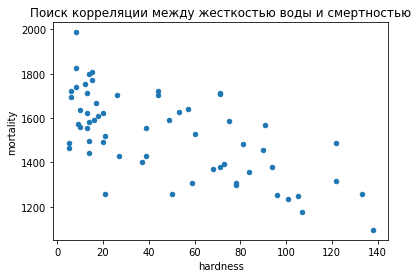

In [3]:
df.plot(kind='scatter', x='hardness', y='mortality', title='Поиск корреляции между жесткостью воды и смертностью')

In [4]:
k_Pirson = df[['hardness', 'mortality']].corr()
k_Spearmen= df[['hardness', 'mortality']].corr(method='spearman')

print('Коэффициент корреляции Пирсона: ', k_Pirson)
print('Коэффициент корреляции Спирмена:', k_Spearmen)

Коэффициент корреляции Пирсона:             hardness  mortality
hardness   1.000000  -0.654849
mortality -0.654849   1.000000
Коэффициент корреляции Спирмена:            hardness  mortality
hardness   1.000000  -0.631665
mortality -0.631665   1.000000


y= -3.187 x + 1675.115


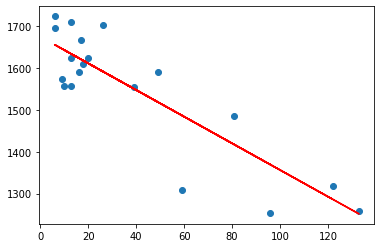

In [5]:
X = df[['hardness']]
y = df['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=6383) 
model = LinearRegression()
model.fit(X_train, y_train)
print( f'y= {round(model.coef_[0],3) } x + {round(model.intercept_,3)}')
y_pred = model.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [6]:
print('Коэффициент детерминации:', model.score(X_test, y_test))

Коэффициент детерминации: 0.7570280355687193


Судя по результатам, некоторая взаимосвязь присутствует, возможно, мягкая вода пагубно воздействует на организм (вымывает соли)
или способствует размножению бактерий, что, в свою очередь, может являться причинами каких-то заболеваний, 
иногда приводящих к смертельным исходам.
Хотя не исключено совпадение или влияние на показатели какого-то стороннего фактора, например, обычно, 
в горных районах, жители которых отличаются здоровьем и долголетием, вода имеет больше соляных примесей. 

### Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

- Разделить данные на 2 группы
- Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [8]:
north = df[df['location']=='North']
south = df[df['location']=='South']

<AxesSubplot:title={'center':'Поиск корреляции между жесткостью воды и смертностью'}, xlabel='hardness', ylabel='mortality'>

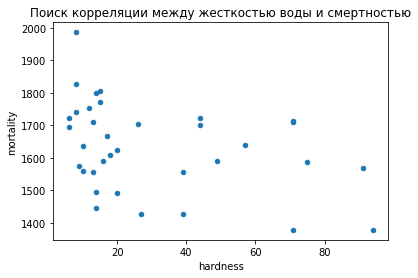

In [9]:
north.plot(kind='scatter', x='hardness', y='mortality', title='Поиск корреляции между жесткостью воды и смертностью')

In [10]:
k_Pirson = north[['hardness', 'mortality']].corr()
k_Spearmen= north[['hardness', 'mortality']].corr(method='spearman')

print('Коэффициент корреляции Пирсона: ', k_Pirson)
print('Коэффициент корреляции Спирмена:', k_Spearmen)

Коэффициент корреляции Пирсона:             hardness  mortality
hardness   1.000000  -0.368598
mortality -0.368598   1.000000
Коэффициент корреляции Спирмена:            hardness  mortality
hardness   1.000000  -0.404208
mortality -0.404208   1.000000


y= -1.612 x + 1683.888


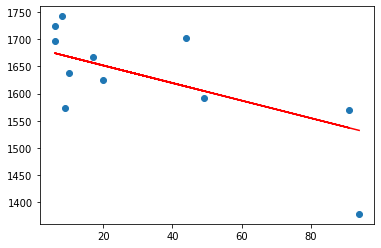

In [11]:
X = north[['hardness']]
y = north['mortality']
nX_train, nX_test, ny_train, ny_test = train_test_split(X, y, test_size=0.30, random_state=7174) 
model = LinearRegression()
model.fit(nX_train, ny_train)
print( f'y= {round(model.coef_[0],3) } x + {round(model.intercept_,3)}')
ny_pred = model.predict(nX_test)
plt.scatter(nX_test, ny_test)
plt.plot(nX_test, ny_pred, c='r')

In [12]:
print('Коэффициент детерминации:', model.score(nX_test, ny_test))

Коэффициент детерминации: 0.5033286961083134


<AxesSubplot:title={'center':'Поиск корреляции между жесткостью воды и смертностью'}, xlabel='hardness', ylabel='mortality'>

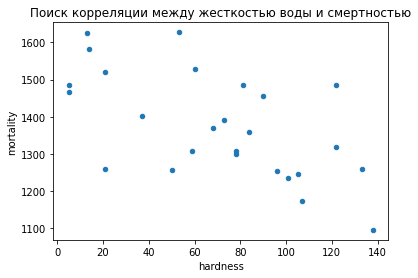

In [13]:
south.plot(kind='scatter', x='hardness', y='mortality', title='Поиск корреляции между жесткостью воды и смертностью')

In [14]:
k_Pirson = south[['hardness', 'mortality']].corr()
k_Spearmen= south[['hardness', 'mortality']].corr(method='spearman')

print('Коэффициент корреляции Пирсона: ', k_Pirson)
print('Коэффициент корреляции Спирмена:', k_Spearmen)

Коэффициент корреляции Пирсона:             hardness  mortality
hardness   1.000000  -0.602153
mortality -0.602153   1.000000
Коэффициент корреляции Спирмена:            hardness  mortality
hardness   1.000000  -0.595723
mortality -0.595723   1.000000


y= -2.016 x + 1521.369


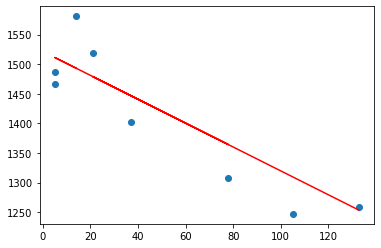

In [15]:
X = south[['hardness']]
y = south['mortality']
sX_train, sX_test, sy_train, sy_test = train_test_split(X, y, test_size=0.30, random_state=9323) 
model = LinearRegression()
model.fit(sX_train, sy_train)
print( f'y= {round(model.coef_[0],3) } x + {round(model.intercept_,3)}')
sy_pred = model.predict(sX_test)
plt.scatter(sX_test, sy_test)
plt.plot(sX_test, sy_pred, c='r')

In [16]:
print('Коэффициент детерминации:', model.score(X_test, y_test))

Коэффициент детерминации: 0.1380571270762554


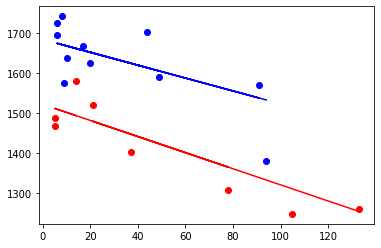

In [22]:
plt.scatter(sX_test, sy_test, c='r')
plt.plot(sX_test, sy_pred, c='r')
plt.scatter(nX_test, ny_test, c='b')
plt.plot(nX_test, ny_pred, c='b')

С разбиением на группы зависимость ослабевает.
Возможно, это связано с уменьшением размера выборки.